# Web Scraping
Here I will be web scrapping a few websites using Pandas HTML reader function.
The reason for opting for this approach is that I find it the simplest and more straight forward apporach at scrapping data from a website.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib notebook

In [2]:
years =[2015, 2016, 2017, 2018, 2019]

data = []

str = 'https://www.basketball-reference.com/leagues/NBA_{}_per_game.html'

for year in years:
    url = str.format(year)
    data.append(url)
    print(url)
    

https://www.basketball-reference.com/leagues/NBA_2015_per_game.html
https://www.basketball-reference.com/leagues/NBA_2016_per_game.html
https://www.basketball-reference.com/leagues/NBA_2017_per_game.html
https://www.basketball-reference.com/leagues/NBA_2018_per_game.html
https://www.basketball-reference.com/leagues/NBA_2019_per_game.html


In [3]:
df_2015 = pd.read_html(data[0])

In [4]:
df_2016 = pd.read_html(data[1])
df_2017 = pd.read_html(data[2])
df_2018 = pd.read_html(data[3])
df_2019 = pd.read_html(data[4])

In [5]:
len(data)

5

In [6]:
len(df_2015)

1

In [7]:
#Changing it into a data frame.
df_2015 = pd.DataFrame(df_2015[0])
df_2016 = pd.DataFrame(df_2016[0])
df_2017 = pd.DataFrame(df_2017[0])
df_2018 = pd.DataFrame(df_2018[0])
df_2019 = pd.DataFrame(df_2019[0])

In [8]:
df_2019.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Álex Abrines,SG,25,OKC,31,2,19.0,1.8,5.1,...,.923,0.2,1.4,1.5,0.6,0.5,0.2,0.5,1.7,5.3
1,2,Quincy Acy,PF,28,PHO,10,0,12.3,0.4,1.8,...,.700,0.3,2.2,2.5,0.8,0.1,0.4,0.4,2.4,1.7
2,3,Jaylen Adams,PG,22,ATL,34,1,12.6,1.1,3.2,...,.778,0.3,1.4,1.8,1.9,0.4,0.1,0.8,1.3,3.2
3,4,Steven Adams,C,25,OKC,80,80,33.4,6.0,10.1,...,.500,4.9,4.6,9.5,1.6,1.5,1.0,1.7,2.6,13.9
4,5,Bam Adebayo,C,21,MIA,82,28,23.3,3.4,5.9,...,.735,2.0,5.3,7.3,2.2,0.9,0.8,1.5,2.5,8.9


### Data cleaning
Here we can see that every 20 rows the collumn names are repeated in the data set. This wil need to be removed as it is not required anymore.

In [9]:
df_2015[df_2015['Age'] == 'Age'][:].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
49,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
72,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
97,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
126,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [10]:
df_2015.drop(df_2015[df_2015['Age'] == 'Age'][:].index,inplace=True)

In [11]:
# Here we can see that the column names have been removed from the data set
df_2015[df_2015['Age'] == 'Age'][:]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [12]:
#when looking at the data closely you can see that there are duplicate entries for 

In [13]:
df_2015['Age'].value_counts()

23    86
24    68
26    65
28    54
27    53
25    49
22    42
29    42
21    30
30    30
32    28
34    22
31    20
20    14
33    14
37     8
38     8
19     8
35     6
36     4
Name: Age, dtype: int64

### Short explatory analysis 

In [14]:
df_2015[['Age','BLK','AST','STL']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 651 entries, 0 to 674
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Age     651 non-null    object
 1   BLK     651 non-null    object
 2   AST     651 non-null    object
 3   STL     651 non-null    object
dtypes: object(4)
memory usage: 25.4+ KB


In [15]:
df_2015[['Age','BLK','AST','STL']]

,Age,BLK,AST,STL
0,24,0.3,1.0,0.4
1,20,0.2,0.5,0.5
2,21,1.2,0.9,0.5
3,28,0.5,0.9,0.2
4,29,0.1,1.7,0.5
...,...,...,...,...
670,26,0.3,2.3,1.6
671,26,0.4,2.8,1.8
672,26,0.3,1.4,1.4
673,22,0.8,1.6,0.5


In [16]:
names = ['BLK','AST','STL']

for y in names:
    df_2015[y] = pd.to_numeric(df_2015[y])



In [17]:
df_2015[['Age','BLK','AST','STL']].describe()

,BLK,AST,STL
count,651.000000,651.000000,651.000000
mean,0.356528,1.814286,0.633180
std,0.425820,1.777291,0.429209
min,0.000000,0.000000,0.000000
25%,0.100000,0.600000,0.300000
50%,0.200000,1.200000,0.600000
75%,0.400000,2.400000,0.800000
max,2.900000,10.800000,2.300000


In [18]:
df_2015GB = df_2015[['Age','BLK','AST','STL']].groupby('Age').sum()
df_2015GB

,BLK,AST,STL
Age,,,
19,2.2,11.1,4.3
20,7.4,24.6,10.2
21,15.2,37.1,17.7
22,15.4,63.7,25.9
23,20.7,117.9,49.3
24,23.5,148.1,47.9
25,20.1,85.5,29.8
26,24.2,135.8,45.4
27,20.3,79.1,31.0


<IPython.core.display.Javascript object>


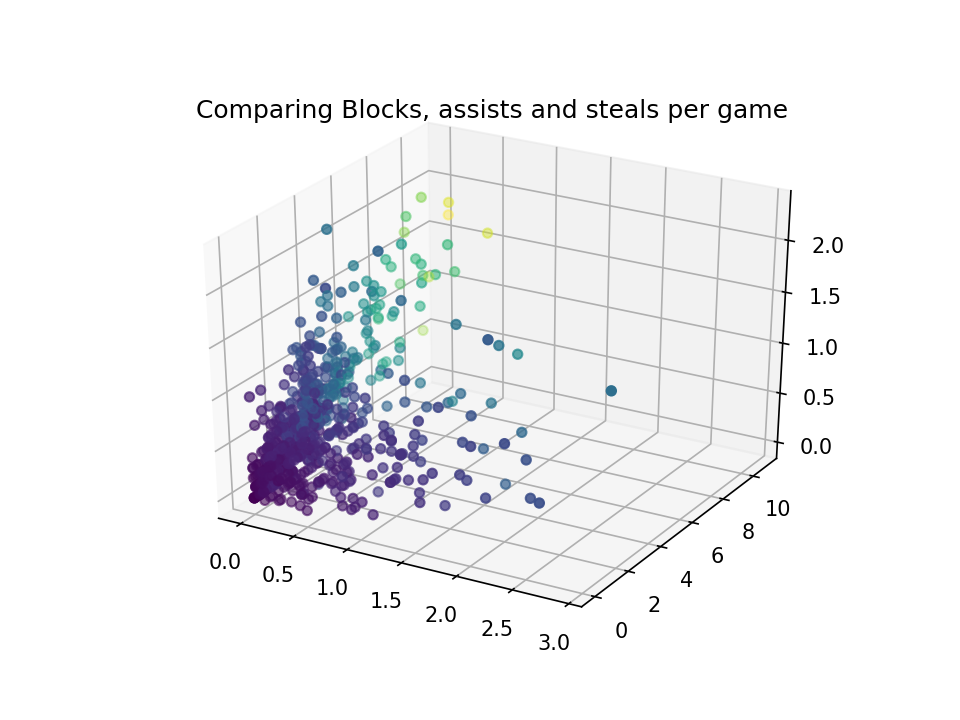

Text(0.5, 0.92, 'Comparing Blocks, assists and steals per game')

In [21]:

fig = plt.figure() 
ax = plt.axes(projection ='3d') 
x = df_2015['BLK']
y = df_2015['AST']
z = df_2015['STL']
ax.scatter(x,y,z,c=np.linalg.norm([x,y,z],axis=0))
ax.set_title('Comparing Blocks, assists and steals per game') 
